In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from pandas.tseries.offsets import MonthBegin
import ta

In [2]:
df=yf.download('AAPL',start='2015-01-01',end='2021-12-31')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,28.205000,28.282499,27.552500,27.594999,24.839489,165613600
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.603207,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.910097,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.912346,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.247643,160423600
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,175.262802,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.289444,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.255447,79144300


In [3]:
df.Close=df['Adj Close']
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,28.205000,28.282499,27.552500,24.839489,24.839489,165613600
2015-01-02,27.847500,27.860001,26.837500,24.603207,24.603207,212818400
2015-01-05,27.072500,27.162500,26.352501,23.910097,23.910097,257142000
2015-01-06,26.635000,26.857500,26.157499,23.912346,23.912346,263188400
2015-01-07,26.799999,27.049999,26.674999,24.247643,24.247643,160423600
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,175.262802,175.262802,68356600
2021-12-27,177.089996,180.419998,177.070007,179.289444,179.289444,74919600
2021-12-28,180.160004,181.330002,178.529999,178.255447,178.255447,79144300


In [4]:
def applyindicators(df):
    df['SMA_200'] = df.Close.rolling(200).mean()
    df['SMA_20'] = df.Close.rolling(20).mean()
    df['stddev'] = df.Close.rolling(20).std()
    df['Upper']=df.SMA_20+2.5*df.stddev
    df['Lower']=df.SMA_20-2.5*df.stddev
    df['rsi']=ta.momentum.rsi(df.Close,2)

In [5]:
applyindicators(df)
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi
Date,,,,,,,,,,,,
2014-12-31,28.205000,28.282499,27.552500,24.839489,24.839489,165613600,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,27.847500,27.860001,26.837500,24.603207,24.603207,212818400,NaN,NaN,NaN,NaN,NaN,0.000000
2015-01-05,27.072500,27.162500,26.352501,23.910097,23.910097,257142000,NaN,NaN,NaN,NaN,NaN,0.000000
2015-01-06,26.635000,26.857500,26.157499,23.912346,23.912346,263188400,NaN,NaN,NaN,NaN,NaN,0.551338
2015-01-07,26.799999,27.049999,26.674999,24.247643,24.247643,160423600,NaN,NaN,NaN,NaN,NaN,62.388724
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,175.262802,175.262802,68356600,141.428068,169.304392,6.477946,185.499258,153.109527,85.401054
2021-12-27,177.089996,180.419998,177.070007,179.289444,179.289444,74919600,141.725650,170.473606,6.026838,185.540701,155.406511,95.723350
2021-12-28,180.160004,181.330002,178.529999,178.255447,178.255447,79144300,142.003415,171.420610,5.658004,185.565620,157.275600,70.223253


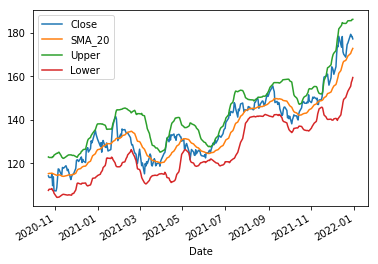

In [6]:
df.tail(300)[['Close','SMA_20','Upper','Lower']].plot()


In [7]:
def conditions(df):
    df['Buy']=np.where((df.Close>df.SMA_200)&(df.Close<df.Lower)&(0.97*df.Close>=df.Low.shift(-1)),1,0)
    df['Sell']=np.where((df.rsi>50),1,0)
    df['Buyprice']=0.97*df.Close
    df['Sellprice']=df.Open.shift(-1)
conditions(df)
df

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2014-12-31,28.205000,28.282499,27.552500,24.839489,24.839489,165613600,NaN,NaN,NaN,NaN,NaN,NaN,0,0,24.094304,27.847500
2015-01-02,27.847500,27.860001,26.837500,24.603207,24.603207,212818400,NaN,NaN,NaN,NaN,NaN,0.000000,0,0,23.865110,27.072500
2015-01-05,27.072500,27.162500,26.352501,23.910097,23.910097,257142000,NaN,NaN,NaN,NaN,NaN,0.000000,0,0,23.192794,26.635000
2015-01-06,26.635000,26.857500,26.157499,23.912346,23.912346,263188400,NaN,NaN,NaN,NaN,NaN,0.551338,0,0,23.194976,26.799999
2015-01-07,26.799999,27.049999,26.674999,24.247643,24.247643,160423600,NaN,NaN,NaN,NaN,NaN,62.388724,0,1,23.520213,27.307501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,175.262802,175.262802,68356600,141.428068,169.304392,6.477946,185.499258,153.109527,85.401054,0,1,170.004918,177.089996
2021-12-27,177.089996,180.419998,177.070007,179.289444,179.289444,74919600,141.725650,170.473606,6.026838,185.540701,155.406511,95.723350,0,1,173.910761,180.160004
2021-12-28,180.160004,181.330002,178.529999,178.255447,178.255447,79144300,142.003415,171.420610,5.658004,185.565620,157.275600,70.223253,0,1,172.907784,179.330002


In [8]:
Buy_sells=df[(df.Buy==1)|(df.Sell==1)]
Buy_sells

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2015-01-07,26.799999,27.049999,26.674999,24.247643,24.247643,160423600,NaN,NaN,NaN,NaN,NaN,62.388724,0,1,23.520213,27.307501
2015-01-08,27.307501,28.037500,27.174999,25.179300,25.179300,237458000,NaN,NaN,NaN,NaN,NaN,91.558439,0,1,24.423921,28.167500
2015-01-09,28.167500,28.312500,27.552500,25.206306,25.206306,214798000,NaN,NaN,NaN,NaN,NaN,91.921661,0,1,24.450117,28.150000
2015-01-13,27.857500,28.200001,27.227501,24.803484,24.803484,268367600,NaN,NaN,NaN,NaN,NaN,52.864891,0,1,24.059379,27.260000
2015-01-20,26.959999,27.242500,26.625000,24.465931,24.465931,199599600,NaN,NaN,NaN,NaN,NaN,68.490485,0,1,23.731953,27.237499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,173.039993,175.860001,172.149994,174.626511,174.626511,92135300,141.155221,168.591530,6.571536,185.020369,152.162691,81.960972,0,1,169.387715,175.850006
2021-12-23,175.850006,176.850006,175.270004,175.262802,175.262802,68356600,141.428068,169.304392,6.477946,185.499258,153.109527,85.401054,0,1,170.004918,177.089996
2021-12-27,177.089996,180.419998,177.070007,179.289444,179.289444,74919600,141.725650,170.473606,6.026838,185.540701,155.406511,95.723350,0,1,173.910761,180.160004


In [9]:
matched=Buy_sells[(Buy_sells.Buy.diff()==1)|(Buy_sells.Sell.diff()==1)]
matched

,Open,High,Low,Close,Adj Close,Volume,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
Date,,,,,,,,,,,,,,,,
2020-02-27,70.275002,71.500000,68.239998,67.149330,67.149330,320605600,58.987777,76.960075,3.572763,85.891983,68.028166,8.931073,1,0,65.134850,64.315002
2020-03-02,70.570000,75.360001,69.430000,73.358055,73.358055,341397200,59.228431,76.227129,4.198172,86.722558,65.731700,80.994209,0,1,71.157313,75.917503


In [10]:
profit=(matched.Sellprice.shift(-1)-matched.Buyprice)/matched.Buyprice
profit

Date
2020-02-27    0.165544
2020-03-02         NaN
dtype: float64